In [28]:
# import packages
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
# allow more collumns and rows to be seen
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn import metrics
import scipy.stats as stats
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
# df['class'] = df['class'].replace({'p':'poisonous', 'e':'edible'})
# df['cap-shape'] = df['cap-shape'].replace({'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat', 'k':'knobbed', 's':'sunken'})
# df['cap-surface'] = df['cap-surface'].replace({'f':'fibrous', 'g':'grooves', 'y':'scaly', 's':'smooth'})
# df['cap-color'] = df['cap-color'].replace({'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 
#                          'e':'red', 'w':'white', 'y':'yellow'})
# df['bruises'] = df['bruises'].replace({'t':'bruises', 'f':'no'})
# df['odor'] = df['odor'].replace({'a':'almond', 'l':'anise', 'c':'creosote', 'y':'fishy', 'f':'foul', 'm':'musty', 'n':'none', 'p':'pungent',
#                     's':'spicy'})
# df['gill-attachment'] = df['gill-attachment'].replace({'a':'attached', 'd':'descending', 'f':'free', 'n':'notched'})
# df['gill-spacing'] = df['gill-spacing'].replace({'c':'close', 'w':'crowded', 'd':'distant'})
# df['gill-size'] = df['gill-size'].replace({'b':'broad', 'n':'narrow'})
# df['gill-color'] = df['gill-color'].replace({'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'g':'gray', 'r':'green', 'o':'orange', 
#                           'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'})
# df['stalk-shape'] = df['stalk-shape'].replace({'e':'enlarging', 't':'tapering'})
# df['stalk-root'] = df['stalk-root'].replace({'b':'bulbous', 'c':'club', 'u':'cup', 'e':'equal', 'z':'rhizomorphs', 'r':'rooted', '?':'missing'})
# df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].replace({'f':'fibrous', 'y':'scaly', 'k':'silky', 's':'smooth'})
# df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].replace({'f':'fibrous', 'y':'scaly', 'k':'silky', 's':'smooth'})
# df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace({'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange', 'p':'pink', 'e':'red', 
#                                       'w':'white', 'y':'yellow'})
# df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace({'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange', 'p':'pink', 'e':'red', 
#                                       'w':'white', 'y':'yellow'})
# df['veil-type'] = df['veil-type'].replace({'p':'partial', 'u':'universal'})
# df['veil-color'] = df['veil-color'].replace({'n':'brown', 'o':'orange', 'w':'white', 'y':'yellow'})
# df['ring-number'] = df['ring-number'].replace({'n':'none', 'o':'one', 't':'two'})
# df['ring-type'] = df['ring-type'].replace({'c':'cobwebby', 'e':'evanescent', 'f':'flaring', 'l':'large', 'n':'none', 'p':'pendant', 's':'sheathing', 
#                          'z':'zone'})
# df['spore-print-color'] = df['spore-print-color'].replace({'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'r':'green', 'o':'orange', 'u':'purple',
#                                  'w':'white', 'y':'yellow'})
# df['population'] = df['population'].replace({'a':'abundant', 'c':'clustered', 'n':'numerous', 's':'scattered', 'v':'several', 'y':'solitary'})
# df['habitat'] = df['habitat'].replace({'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 'u':'urban', 'w':'waste', 'd':'woods'})

In [29]:
df = pd.read_csv('decoded_mushrooms.csv')

In [30]:
df

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,missing,smooth,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [31]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

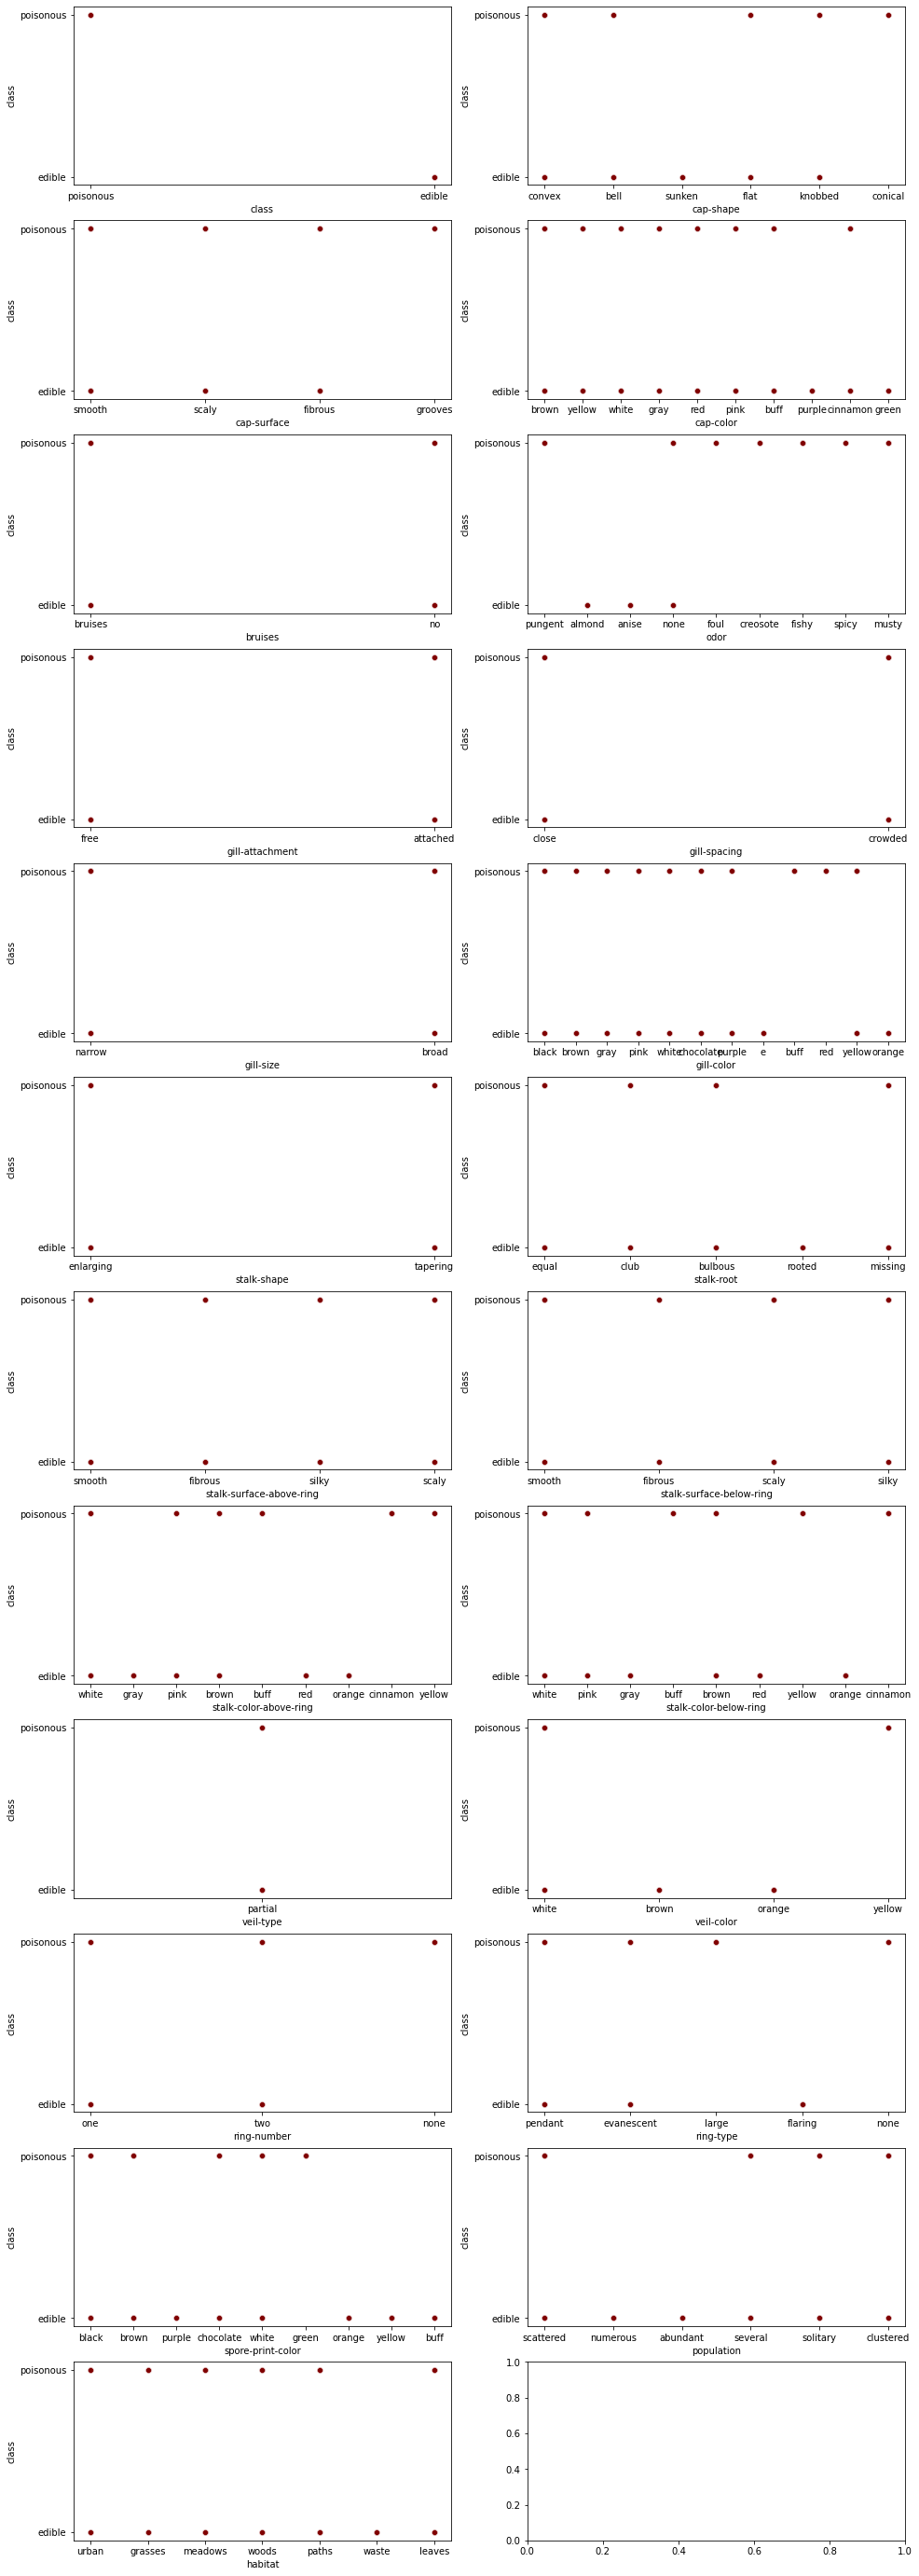

In [32]:
fig, axes = plt.subplots (nrows=12, ncols=2, figsize=(16,50))

for i, column in enumerate(df):
    sns.scatterplot(data=df, x=column, y='class', ax=axes[i//2, i%2], color = 'maroon')

In [33]:
df['cap-shape'].unique()
df['cap-shape'] = df['cap-shape'].map({'convex':1, 'bell':2, 'sunken':3, 'flat':4, 'knobbed':5, 'conical':6})
df['cap-surface'].unique()
df['cap-surface'] = df['cap-surface'].map({'smooth':1, 'scaly':2, 'fibrous':3, 'grooves':4})
df['cap-color'].unique()
df['cap-color'] = df['cap-color'].map({'brown':1, 'yellow':2, 'white':3, 'gray':4, 'red':5, 'pink':6, 'buff':7, 
                                       'purple':8, 'cinnamon':9, 'green': 10})
df['bruises'].unique()
df['bruises'] = df['bruises'].map({'bruises':1, 'no':2})
df['odor'].unique()
df['odor'] = df['odor'].map({'pungent':1, 'almond':2, 'anise':3, 'none':4, 'foul':5, 'creosote':6, 'fishy':7, 
                                       'spicy':8, 'musty': 9})
df['gill-attachment'].unique()
df['gill-attachment'] = df['gill-attachment'].map({'free':1, 'attached':2})
df['gill-spacing'].unique()
df['gill-spacing'] = df['gill-spacing'].map({'close':1, 'crowded':2})
df['gill-size'].unique()
df['gill-size'] = df['gill-size'].map({'narrow':1, 'broad':2})
df['gill-color'].unique()
df['gill-color'] = df['gill-color'].map({'black':1, 'brown':2, 'gray':3, 'pink':4, 'white':5, 'chocolate':6, 'purple':7, 
                                       'e':8, 'buff': 9, 'red':10, 'yellow':11, 'orange':12})
df['stalk-shape'].unique()
df['stalk-shape'] = df['stalk-shape'].map({'enlarging':1, 'tapering':2})
df['stalk-root'].unique()
df['stalk-root'] = df['stalk-root'].map({'equal':1, 'club':2, 'bulbous':3, 'rooted':4, 'missing':5})
df['stalk-surface-above-ring'].unique()
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map({'smooth':1, 'fibrous':2, 'silky':3, 'scaly':4})
df['stalk-surface-below-ring'].unique()
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map({'smooth':1, 'fibrous':2, 'scaly':3, 'silky':4})
df['stalk-color-above-ring'].unique()
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map({'white':1, 'gray':2, 'pink':3, 'brown':4, 'buff':5, 'red':6,
                                                                 'orange':7, 'cinnamon':8, 'yellow': 9})
df['stalk-color-below-ring'].unique()
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map({'white':1, 'pink':2, 'gray':3, 'buff':4, 'brown':5,
                                                                    'red':6, 'yellow':7, 'orange':8, 'cinnamon': 9})
df['veil-type'].unique()
df['veil-type'] = df['veil-type'].map({'partial':1})
df['veil-color'].unique()
df['veil-color'] = df['veil-color'].map({'white':1, 'brown':2, 'orange':3, 'yellow':4})
df['ring-number'].unique()
df['ring-number'] = df['ring-number'].map({'one':1, 'two':2, 'none':3})
df['ring-type'].unique()
df['ring-type'] = df['ring-type'].map({'pendant':1, 'evanescent':2, 'large':3, 'flaring':4, 'none':5})
df['spore-print-color'].unique()
df['spore-print-color'] = df['spore-print-color'].map({'black':1, 'brown':2, 'purple':3, 'chocolate':4, 'white':5, 'green':6, 
                                                       'orange':7, 'yellow':8, 'buff': 9})
df['population'].unique()
df['population'] = df['population'].map({'scattered':1, 'numerous':2, 'abundant':3, 'several':4, 'solitary':5, 'clustered':6})
df['habitat'].unique()
df['habitat'] = df['habitat'].map({'urban':1, 'grasses':2, 'meadows':3, 'woods':4, 'paths':5, 'waste':6, 'leaves':7})
df['class'].unique()
df['class'] = df['class'].map({'poisonous':1, 'edible':2})

In [34]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,2,2,2
2,2,2,1,3,1,3,1,1,2,2,1,2,1,1,1,1,1,1,1,1,2,2,3
3,1,1,2,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2,1,1,4,2,4,1,2,2,1,2,1,1,1,1,1,1,1,1,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,5,1,1,2,4,2,1,2,11,1,5,1,1,7,8,1,3,1,1,9,6,7
8120,2,1,1,1,2,4,2,1,2,11,1,5,1,1,7,8,1,2,1,1,9,4,7
8121,2,4,1,1,2,4,2,1,2,2,1,5,1,1,7,8,1,3,1,1,9,6,7
8122,1,5,2,1,2,7,1,1,1,9,2,5,1,4,1,1,1,1,1,2,5,4,7


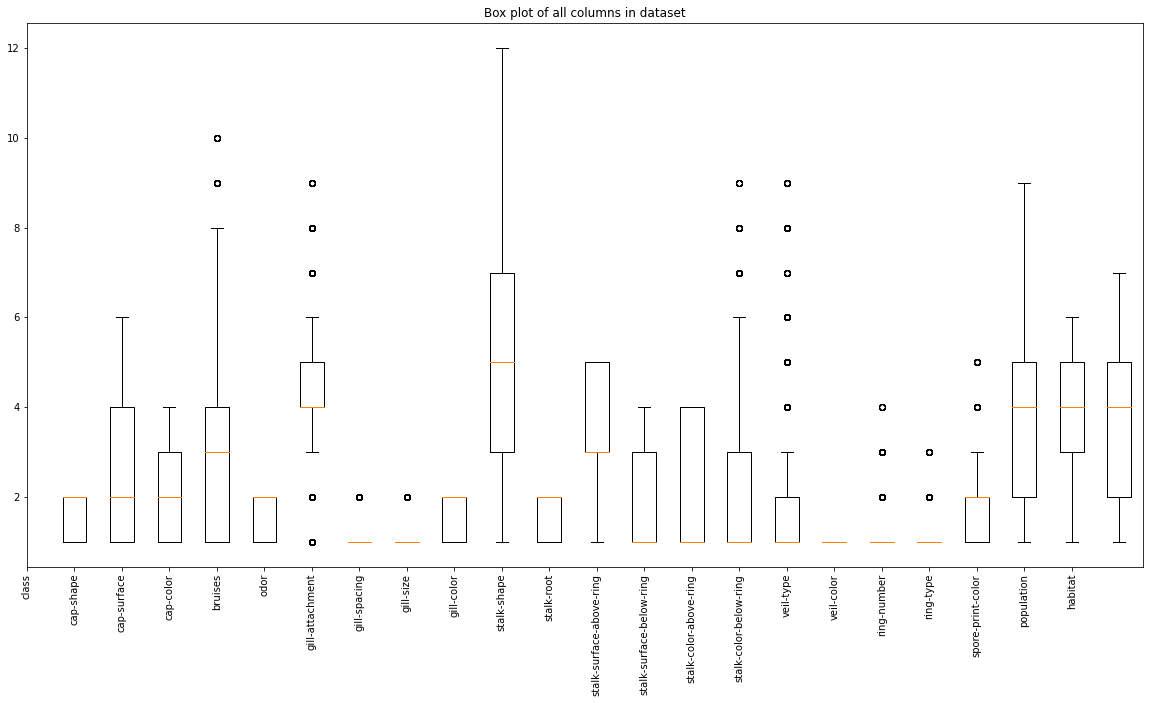

In [35]:
#-----Use this when in number format -------
plt.figure(figsize=(20, 10))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(len(df.columns.values)), df.columns.values, rotation='vertical')
plt.show()

In [36]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

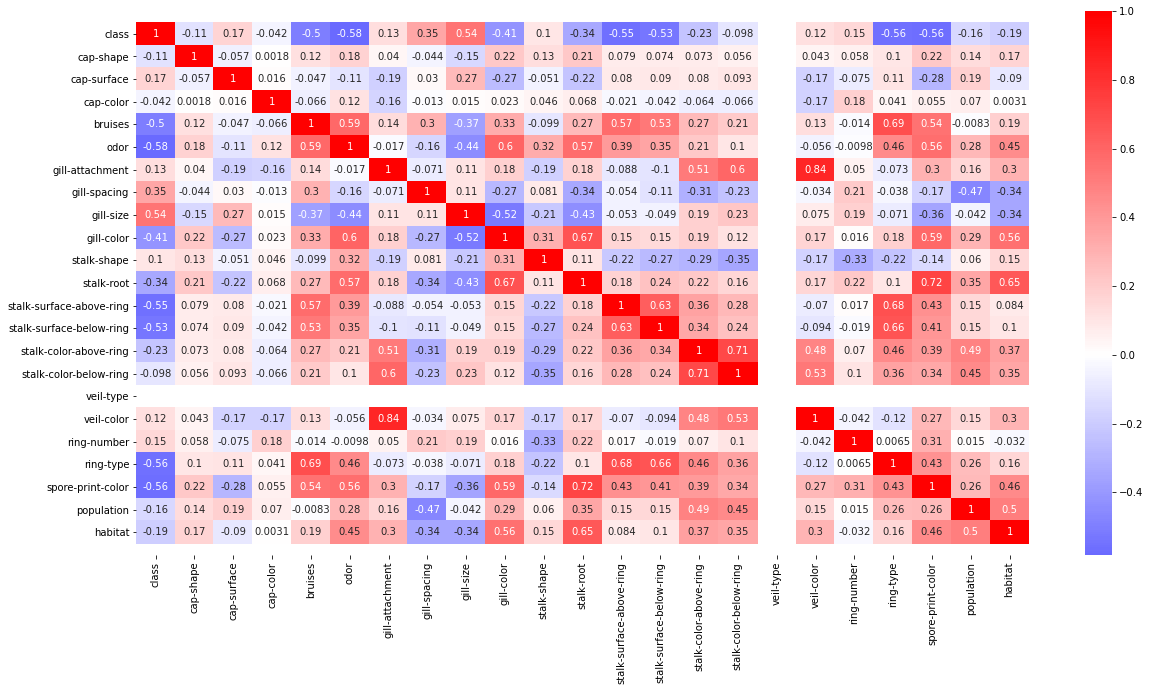

<Figure size 432x288 with 0 Axes>

In [37]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

plt.savefig('images/heatmap')

# Feature Eningeering

spore related
color rated


## 1

In [38]:
#habitat - human effected v not 

1 represents urban areas, 5 represents paths, 6 represents waste

'urban':1, 'grasses':2, 'meadows':3, 'woods':4, 'paths':5, 'waste':6, 'leaves':7

In [53]:
df['human_interference'] = np.where((df['habitat'] == 5) | (df['habitat'] == 1) | (df['habitat'] == 6), 0, 1)

0 for human interference and 1 for nature

In [54]:
df['human_interference']

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: human_interference, Length: 8124, dtype: int32

In [55]:
df['human_interference'].value_counts()

1    6420
0    1704
Name: human_interference, dtype: int64

1704 human areas and 6420 nature areas

## Feature Engineer 2 

In [42]:
df['odor']

0       1
1       2
2       3
3       1
4       4
       ..
8119    4
8120    4
8121    4
8122    7
8123    4
Name: odor, Length: 8124, dtype: int64

'pungent':1, 'almond':2, 'anise':3, 'none':4, 'foul':5, 'creosote':6, 'fishy':7, 
                                       'spicy':8, 'musty': 9

In [56]:
df['smell_quality'] = np.where((df['odor'] == 2) | (df['odor'] == 3) | (df['odor'] == 4) | (df['odor'] == 8), 0, 1)

0 for fine smell 1 for bad smell

In [57]:
df['smell_quality'].value_counts()

0    4904
1    3220
Name: smell_quality, dtype: int64

4904 smell fine and 3220 smell bad

## Feature Engineer 3 

df['spore-print-color'] = df['spore-print-color'].map({'black':1, 'brown':2, 'purple':3, 'chocolate':4, 'white':5, 'green':6, 
                                                       'orange':7, 'yellow':8, 'buff': 9})

<AxesSubplot:xlabel='spore-print-color', ylabel='class'>

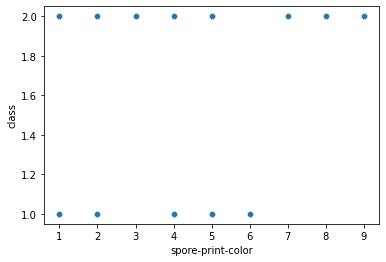

In [45]:
sns.scatterplot(data=df, x=df['spore-print-color'], y='class')

1 = poison, 2 = edible

Chlorophyllum molybdites is responsible for the mushrooms green color. 

In [60]:
df['c_molybdites'] = np.where((df['spore-print-color'] == 6), 0, 1)

0 has Chlorophyllum molybdites and 1 does not

In [61]:
df['c_molybdites'].value_counts()

1    8052
0      72
Name: c_molybdites, dtype: int64

In the scatterplot purple (3), orange(7), yellow(8), and buff(9) were all poisonous. 

In [63]:
df['spore_color'] = np.where((df['spore-print-color'] == 3) | (df['spore-print-color'] == 7) | (df['spore-print-color'] == 8)
                             | (df['spore-print-color'] == 9), 0, 1)

0 poison, 1 where more likely edible

In [64]:
df['spore_color'].value_counts()

1    7932
0     192
Name: spore_color, dtype: int64

## Feature Engineer 4 

df['ring-number'] = df['ring-number'].map({'one':1, 'two':2, 'none':3})

According to our scatterplot, mushrooms without rings are poisonous.

In [65]:
df['no_rings'] = np.where(df['ring-number'] == 3, 0, 1)

0 no rings, 1 rings

In [66]:
df['no_rings'].value_counts()

1    8088
0      36
Name: no_rings, dtype: int64

In [67]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,location,smell,green,spore_color,no_rings,human_interference,smell_quality,c_molybdites
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1
1,2,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,2,2,2,1,0,1,1,1,1,0,1
2,2,2,1,3,1,3,1,1,2,2,1,2,1,1,1,1,1,1,1,1,2,2,3,1,0,1,1,1,1,0,1
3,1,1,2,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1
4,2,1,1,4,2,4,1,2,2,1,2,1,1,1,1,1,1,1,1,2,2,3,2,1,0,1,1,1,1,0,1


In [69]:
df.to_csv('mushroom_ft_engineer.csv')

# Modeling

In [36]:
target = df['class']
relevant_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first = True)

In [37]:
# fit a logistic regression model and store the class predictions
logreg = LogisticRegression(random_state=42)
X = df[relevant_columns]
y = target
logreg.fit(X, y)
df['mushroom_pred_class'] = logreg.predict(X)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
#view mushroom_pred_class column
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom_pred_class
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,2,2,2,2
2,2,2,1,3,1,3,1,1,2,2,1,2,1,1,1,1,1,1,1,1,2,2,3,2
3,1,1,2,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2,1,1,4,2,4,1,2,2,1,2,1,1,1,1,1,1,1,1,2,2,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,5,1,1,2,4,2,1,2,11,1,5,1,1,7,8,1,3,1,1,9,6,7,2
8120,2,1,1,1,2,4,2,1,2,11,1,5,1,1,7,8,1,2,1,1,9,4,7,2
8121,2,4,1,1,2,4,2,1,2,2,1,5,1,1,7,8,1,3,1,1,9,6,7,2
8122,1,5,2,1,2,7,1,1,1,9,2,5,1,4,1,1,1,1,1,2,5,4,7,1


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.25, random_state = 21)

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [45]:
print(y_train_pred)
print(y_test_pred)

[2 1 2 ... 1 1 1]
[2 2 1 ... 2 2 2]


In [ ]:
#confusion matrix evaluations - generate predictions and compare against actual - #decision tree accuracy notebook 
#accuracy score 

In [48]:
#find RMSE of test set
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_test_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))

Mean Absolute Error:0.0
Mean Squared Error:0.0
Root Mean Squared Error:0.0


In [49]:
#find RMSE of train set
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_train_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))

Mean Absolute Error:0.0
Mean Squared Error:0.0
Root Mean Squared Error:0.0


# More modeling

Precision = TP/(TP+FP)
of the cases you predicted as positive how many are actually positive 

recall = TP/(TP +FN) of all the positives how many are true